In [2]:
import pandas as pd

# Path to the data file
file_path = 'data/MachineLearningRating_v3.txt'

# Read the first 5 lines to inspect the structure
print("First 5 lines of the data file:")
try:
    with open(file_path, 'r') as f:
        for i in range(5):
            print(f.readline().strip())
except Exception as e:
    print(f"Error reading file: {e}")

# Attempt to load the data using pipe delimiter
print("\nAttempting to load data with pipe delimiter...")
try:
    # Load the full dataset using the correct pipe delimiter
    df = pd.read_csv(file_path, sep='|')
    print("Successfully loaded the data with pipe delimiter.")
    print("DataFrame head:")
    print(df.head())
    print("\nDataFrame info:")
    df.info()
    print("\nDataFrame shape:")
    print(df.shape)
except Exception as e:
    print(f"Could not load with pipe delimiter: {e}")
    print("\nPlease inspect the first few lines printed above to determine the correct delimiter and structure.")

First 5 lines of the data file:
UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|1459|Rand East|Rand East|Mobility - Motor|44069150|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|130|S/D|4|6/2002|119300|Yes|No|119300|More than 6 months||||||0.01|

c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (32,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully loaded the data with pipe delimiter.
DataFrame head:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelecte

In [3]:
# --- Data Cleaning and Preprocessing ---

# Make a copy of the DataFrame to avoid modifying the original loaded data
# df is the DataFrame loaded in the previous cell
df_cleaned = df.copy()

# Address DtypeWarning and convert columns

# Column 'CapitalOutstanding' (column 32)
print(f"Unique values in 'CapitalOutstanding' before conversion (first 10): {df_cleaned['CapitalOutstanding'].unique()[:10]}")
df_cleaned['CapitalOutstanding'] = pd.to_numeric(df_cleaned['CapitalOutstanding'], errors='coerce')
print(f"Data type of 'CapitalOutstanding' after conversion: {df_cleaned['CapitalOutstanding'].dtype}")

# Column 'CrossBorder' (column 37)
print(f"\nUnique values in 'CrossBorder' before conversion: {df_cleaned['CrossBorder'].unique()}")
# It appears to be mostly NaN with a few string values. We will keep it as object for now and analyze further during EDA.

# Convert date columns
print("\nConverting date columns...")
if 'TransactionMonth' in df_cleaned.columns:
    df_cleaned['TransactionMonth'] = pd.to_datetime(df_cleaned['TransactionMonth'], errors='coerce')
    print(f"'TransactionMonth' dtype after conversion: {df_cleaned['TransactionMonth'].dtype}")
if 'VehicleIntroDate' in df_cleaned.columns:
    df_cleaned['VehicleIntroDate'] = pd.to_datetime(df_cleaned['VehicleIntroDate'], errors='coerce')
    print(f"'VehicleIntroDate' dtype after conversion: {df_cleaned['VehicleIntroDate'].dtype}")

# Drop 'NumberOfVehiclesInFleet' as it's empty
print("\nDropping 'NumberOfVehiclesInFleet' column...")
if 'NumberOfVehiclesInFleet' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['NumberOfVehiclesInFleet'])
    print("'NumberOfVehiclesInFleet' dropped.")
else:
    print("'NumberOfVehiclesInFleet' not found or already dropped.")

# Display updated info
print("\nDataFrame info after initial cleaning:")
df_cleaned.info()

# --- Data Summarization ---
print("\n--- Data Summarization ---")

# Data Quality Assessment: Missing Values
print("\nMissing values summary (count and percentage):")
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values * 100 / len(df_cleaned)).sort_values(ascending=False)
missing_summary = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])
print(missing_summary[missing_summary['Missing Count'] > 0])

# Descriptive Statistics: Numerical Columns
print("\nDescriptive statistics for numerical columns:")
print(df_cleaned.describe())

# Descriptive Statistics: Object (Categorical) and Boolean Columns
print("\nDescriptive statistics for object (categorical) and boolean columns:")
print(df_cleaned.describe(include=['object', 'bool']))

# Descriptive Statistics: Datetime Columns
print("\nDescriptive statistics for datetime columns:")
print(df_cleaned.describe(include=['datetime64[ns]']))

# Store the cleaned dataframe for subsequent cells
%store df_cleaned

Unique values in 'CapitalOutstanding' before conversion (first 10): [119300 161000 52700 127300 146800 140400 208800 86300 48100 62400]
Data type of 'CapitalOutstanding' after conversion: float64

Unique values in 'CrossBorder' before conversion: [nan 'No']

Converting date columns...
Data type of 'CapitalOutstanding' after conversion: float64

Unique values in 'CrossBorder' before conversion: [nan 'No']

Converting date columns...
'TransactionMonth' dtype after conversion: datetime64[ns]
'TransactionMonth' dtype after conversion: datetime64[ns]
'VehicleIntroDate' dtype after conversion: datetime64[ns]

Dropping 'NumberOfVehiclesInFleet' column...
'VehicleIntroDate' dtype after conversion: datetime64[ns]

Dropping 'NumberOfVehiclesInFleet' column...
'NumberOfVehiclesInFleet' dropped.

DataFrame info after initial cleaning:
'NumberOfVehiclesInFleet' dropped.

DataFrame info after initial cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data colum

C:\Users\Owner\AppData\Local\Temp/ipykernel_14464/454142313.py:59: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df_cleaned.describe(include=['datetime64[ns]']))


           TransactionMonth     VehicleIntroDate
count               1000098               999546
unique                   23                  160
top     2015-08-01 00:00:00  2012-04-01 00:00:00
freq                 106747               287638
first   2013-10-01 00:00:00  1977-10-01 00:00:00
last    2015-08-01 00:00:00  2014-09-01 00:00:00
Stored 'df_cleaned' (DataFrame)
Stored 'df_cleaned' (DataFrame)


In [7]:
# --- Further Data Cleaning ---
%store -r df_cleaned # Load the cleaned dataframe from the previous cell

import numpy as np

# 1. Investigate and handle negative values
print("Investigating negative values:")
print(f"Negative TotalPremium count: {len(df_cleaned[df_cleaned['TotalPremium'] < 0])}")
print(f"Negative TotalClaims count: {len(df_cleaned[df_cleaned['TotalClaims'] < 0])}")
print(f"Negative CapitalOutstanding count: {len(df_cleaned[df_cleaned['CapitalOutstanding'] < 0])}")

# For now, let's see their values. Depending on the context/amount, 
# we might replace them with 0, NaN, or remove rows.
print("\nSample of negative TotalPremium entries:")
print(df_cleaned[df_cleaned['TotalPremium'] < 0][['TotalPremium', 'TotalClaims']].head())
print("\nSample of negative TotalClaims entries:")
print(df_cleaned[df_cleaned['TotalClaims'] < 0][['TotalPremium', 'TotalClaims']].head())

# Strategy: Given they are financial values, negative values are likely errors or represent refunds/adjustments.
# For this initial EDA, we will convert negative values in TotalPremium and TotalClaims to NaN to exclude them from sum/mean calculations for now.
# A more definitive strategy would require business domain knowledge.
df_cleaned['TotalPremium'] = df_cleaned['TotalPremium'].apply(lambda x: np.nan if x < 0 else x)
df_cleaned['TotalClaims'] = df_cleaned['TotalClaims'].apply(lambda x: np.nan if x < 0 else x)
# For CapitalOutstanding, negative might be an error, let's also set to NaN for now.
df_cleaned['CapitalOutstanding'] = df_cleaned['CapitalOutstanding'].apply(lambda x: np.nan if x < 0 else x)

print("\nCounts after handling negative values (set to NaN):")
print(f"Negative TotalPremium count: {len(df_cleaned[df_cleaned['TotalPremium'] < 0])}")
print(f"Negative TotalClaims count: {len(df_cleaned[df_cleaned['TotalClaims'] < 0])}")
print(f"NaN TotalPremium count: {df_cleaned['TotalPremium'].isnull().sum()}")
print(f"NaN TotalClaims count: {df_cleaned['TotalClaims'].isnull().sum()}")

# 2. Handle blank string in 'Citizenship'
print("\nHandling blank strings in 'Citizenship'...")
print(f"Value counts for Citizenship before: \n{df_cleaned['Citizenship'].value_counts(dropna=False)}")
df_cleaned['Citizenship'] = df_cleaned['Citizenship'].replace('  ', 'Unknown') # Assuming two spaces based on previous output, adjust if different
df_cleaned['Citizenship'] = df_cleaned['Citizenship'].fillna('Unknown')
print(f"Value counts for Citizenship after: \n{df_cleaned['Citizenship'].value_counts(dropna=False)}")

# 3. Drop uninformative columns
columns_to_drop = ['Language', 'Country', 'StatutoryClass', 'StatutoryRiskType', 'CrossBorder']
# mmcode might be an internal ID, let's keep for now but review later if it's useful for modeling
print(f"\nDropping columns: {columns_to_drop}")
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')
print(f"DataFrame shape after dropping columns: {df_cleaned.shape}")

# 4. Address 0 values in specific numeric columns (Cylinders, cubiccapacity, kilowatts, NumberOfDoors)
# These might be legitimate (e.g. electric vehicles) or missing data.
# For now, we'll just note them. Imputation or specific handling might be needed later if they are confirmed errors.
print("\nChecking for 0 values in key vehicle specs:")
for col in ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']:
    if col in df_cleaned.columns:
        zero_count = len(df_cleaned[df_cleaned[col] == 0])
        if zero_count > 0:
            print(f"Number of 0 values in {col}: {zero_count} ({zero_count*100/len(df_cleaned):.2f}%)")

print("\nDataFrame info after further cleaning:")
df_cleaned.info()

%store df_cleaned

no stored variable or alias #
no stored variable or alias Load
no stored variable or alias the
no stored variable or alias cleaned
no stored variable or alias dataframe
no stored variable or alias from
no stored variable or alias the
no stored variable or alias previous
no stored variable or alias cell
Investigating negative values:
Negative TotalPremium count: 288
Negative TotalClaims count: 5
Negative CapitalOutstanding count: 279

Sample of negative TotalPremium entries:
        TotalPremium  TotalClaims
82130     -42.606516          0.0
118503    -45.112782          0.0
121945    -24.900962          0.0
126228    -58.573854          0.0
134693    -24.900962          0.0

Sample of negative TotalClaims entries:
        TotalPremium   TotalClaims
183527      0.000000   -635.480000
230745      0.000000   -256.350000
605407    641.836053 -12002.412281
903685    570.573333  -5690.719298
915444      0.000000    -72.000000
Negative TotalPremium count: 288
Negative TotalClaims count: 5
Neg

In [4]:
# Data Summarization: Descriptive Statistics for Numerical Features
print("\nDescriptive statistics for numerical features:")
print(df.describe())


Descriptive statistics for numerical features:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.98

In [5]:
# Data Summarization: Descriptive Statistics for Categorical Features
print("\nDescriptive statistics for categorical/object features:")
print(df.describe(include='object'))


Descriptive statistics for categorical/object features:
           TransactionMonth Citizenship   LegalType    Title Language  \
count               1000098     1000098     1000098  1000098  1000098   
unique                   23           4           6        5        1   
top     2015-08-01 00:00:00              Individual       Mr  English   
freq                 106747      895210      911929   933555  1000098   

                       Bank      AccountType  MaritalStatus         Gender  \
count                959866           959866        1000098        1000098   
unique                   12                3              4              4   
top     First National Bank  Current account  Not specified  Not specified   
freq                 260811           597938         986208         940990   

             Country  ... CrossBorder TermFrequency ExcessSelected  \
count        1000098  ...         698       1000098        1000098   
unique             1  ...           1         

In [6]:
# Data Quality Assessment: Missing Values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print(missing_info.sort_values(by='Missing Count', ascending=False))


Missing values per column:
                          Missing Count  Missing Percentage
NumberOfVehiclesInFleet         1000098          100.000000
CrossBorder                      999400           99.930207
CustomValueEstimate              779642           77.956560
WrittenOff                       641901           64.183810
Rebuilt                          641901           64.183810
Converted                        641901           64.183810
NewVehicle                       153295           15.327998
AccountType                       40232            4.022806
Bank                              40232            4.022806
VehicleType                         552            0.055195
mmcode                              552            0.055195
VehicleIntroDate                    552            0.055195
NumberOfDoors                       552            0.055195
kilowatts                           552            0.055195
cubiccapacity                       552            0.055195
Cylinders   

Ensure df_cleaned is loaded. Current shape: (1000098, 46)

Plotting histograms for key numerical features...


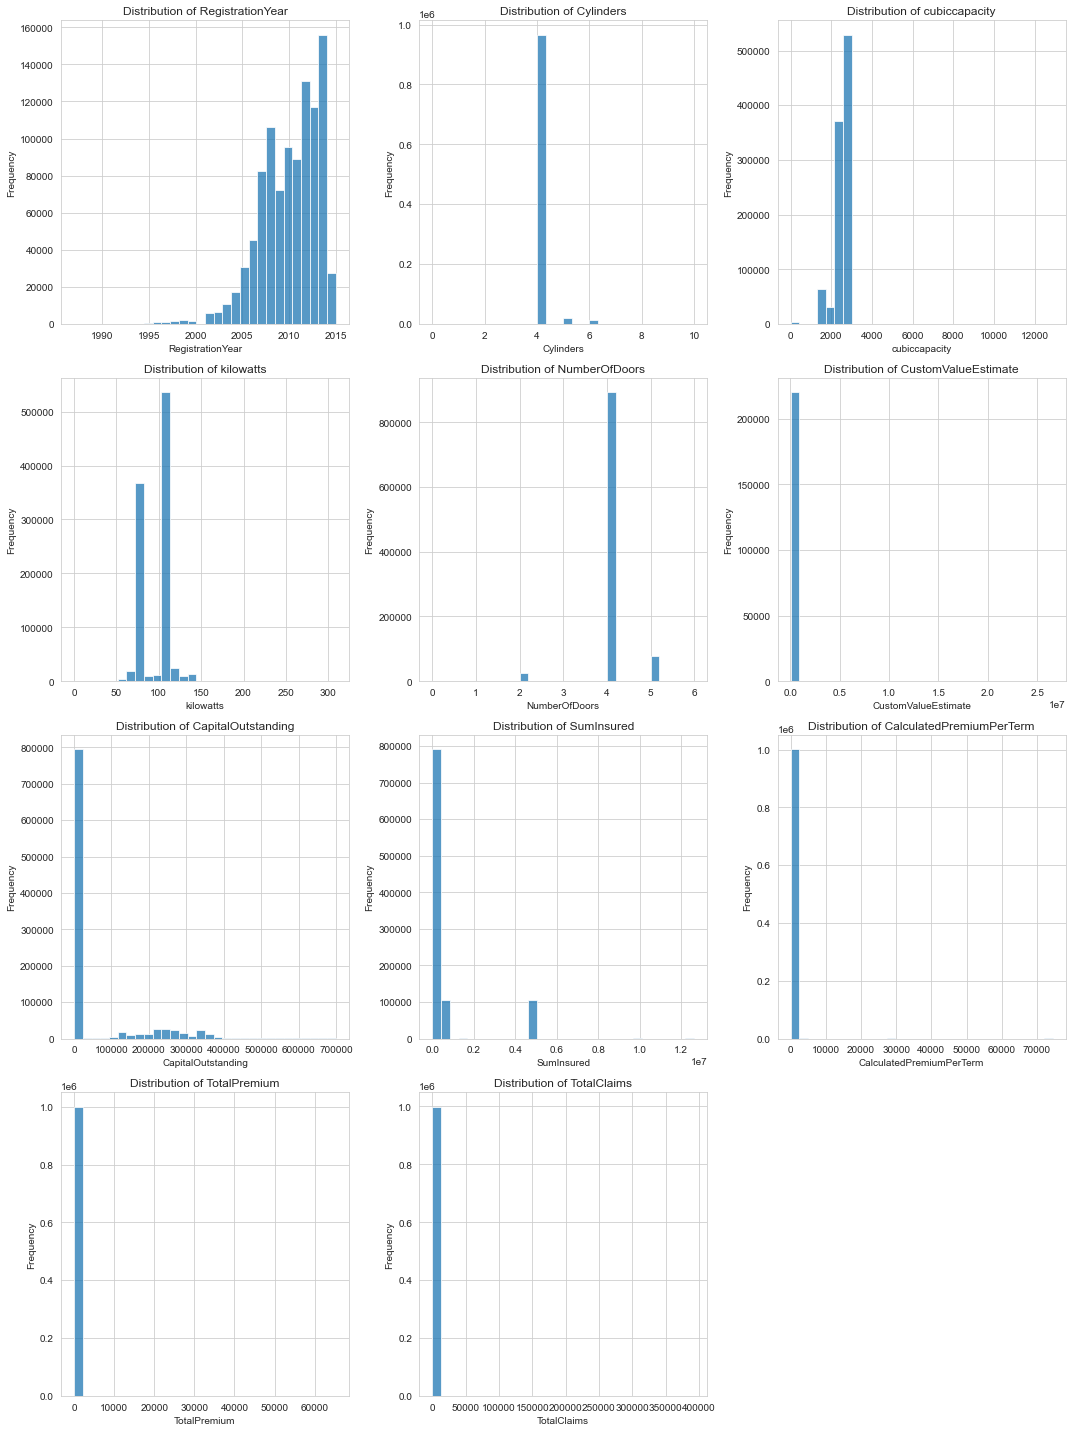


Descriptive statistics for numerical columns (reminder):
       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.000000   
25%        2.008000e+03       4.000000    2237.000000      75.000000   
50%        2.011000e+03       4.000000    2694.000000     111.000000   
75%        2.013000e+03       4.000000    2694.000000     111.000000   
max        2.015000e+03      10.000000   12880.000000     309.000000   

       NumberOfDoors  CustomValueEstimate  CapitalOutstanding    SumInsured  \
count  999546.000000         2.204560e+05       999497.000000  1.000098e+06   
mean        4.019250         2.255311e+05        52619.905489  6.041727e+05   
std         0.468314         5.645157e+05       111429.2

In [8]:
# --- Univariate Analysis: Numerical Features ---
# %store -r df_cleaned # Ensure df_cleaned is available if running cells independently, otherwise it should be in memory

import matplotlib.pyplot as plt
import seaborn as sns

print("Ensure df_cleaned is loaded. Current shape:", df_cleaned.shape)

# Set style for plots
sns.set_style("whitegrid")

# Select key numerical columns for initial histograms
# We will avoid plotting IDs or high-cardinality discrete numerics like PostalCode as histograms directly
numerical_cols_for_hist = [
    'RegistrationYear',
    'Cylinders',
    'cubiccapacity',
    'kilowatts',
    'NumberOfDoors',
    'CustomValueEstimate',
    'CapitalOutstanding',
    'SumInsured',
    'CalculatedPremiumPerTerm',
    'TotalPremium',
    'TotalClaims'
]

# Plot histograms
print("\nPlotting histograms for key numerical features...")
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols_for_hist):
    if col in df_cleaned.columns:
        plt.subplot(4, 3, i + 1)
        sns.histplot(df_cleaned[col].dropna(), kde=False, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        print(f"Column {col} not found in df_cleaned for histogram plotting.")

plt.tight_layout()
plt.show()

# Display descriptive statistics again for reference with histograms
print("\nDescriptive statistics for numerical columns (reminder):")
print(df_cleaned[numerical_cols_for_hist].describe())

Ensure df_cleaned is loaded. Current shape: (1000098, 46)

Plotting bar charts for key categorical features...


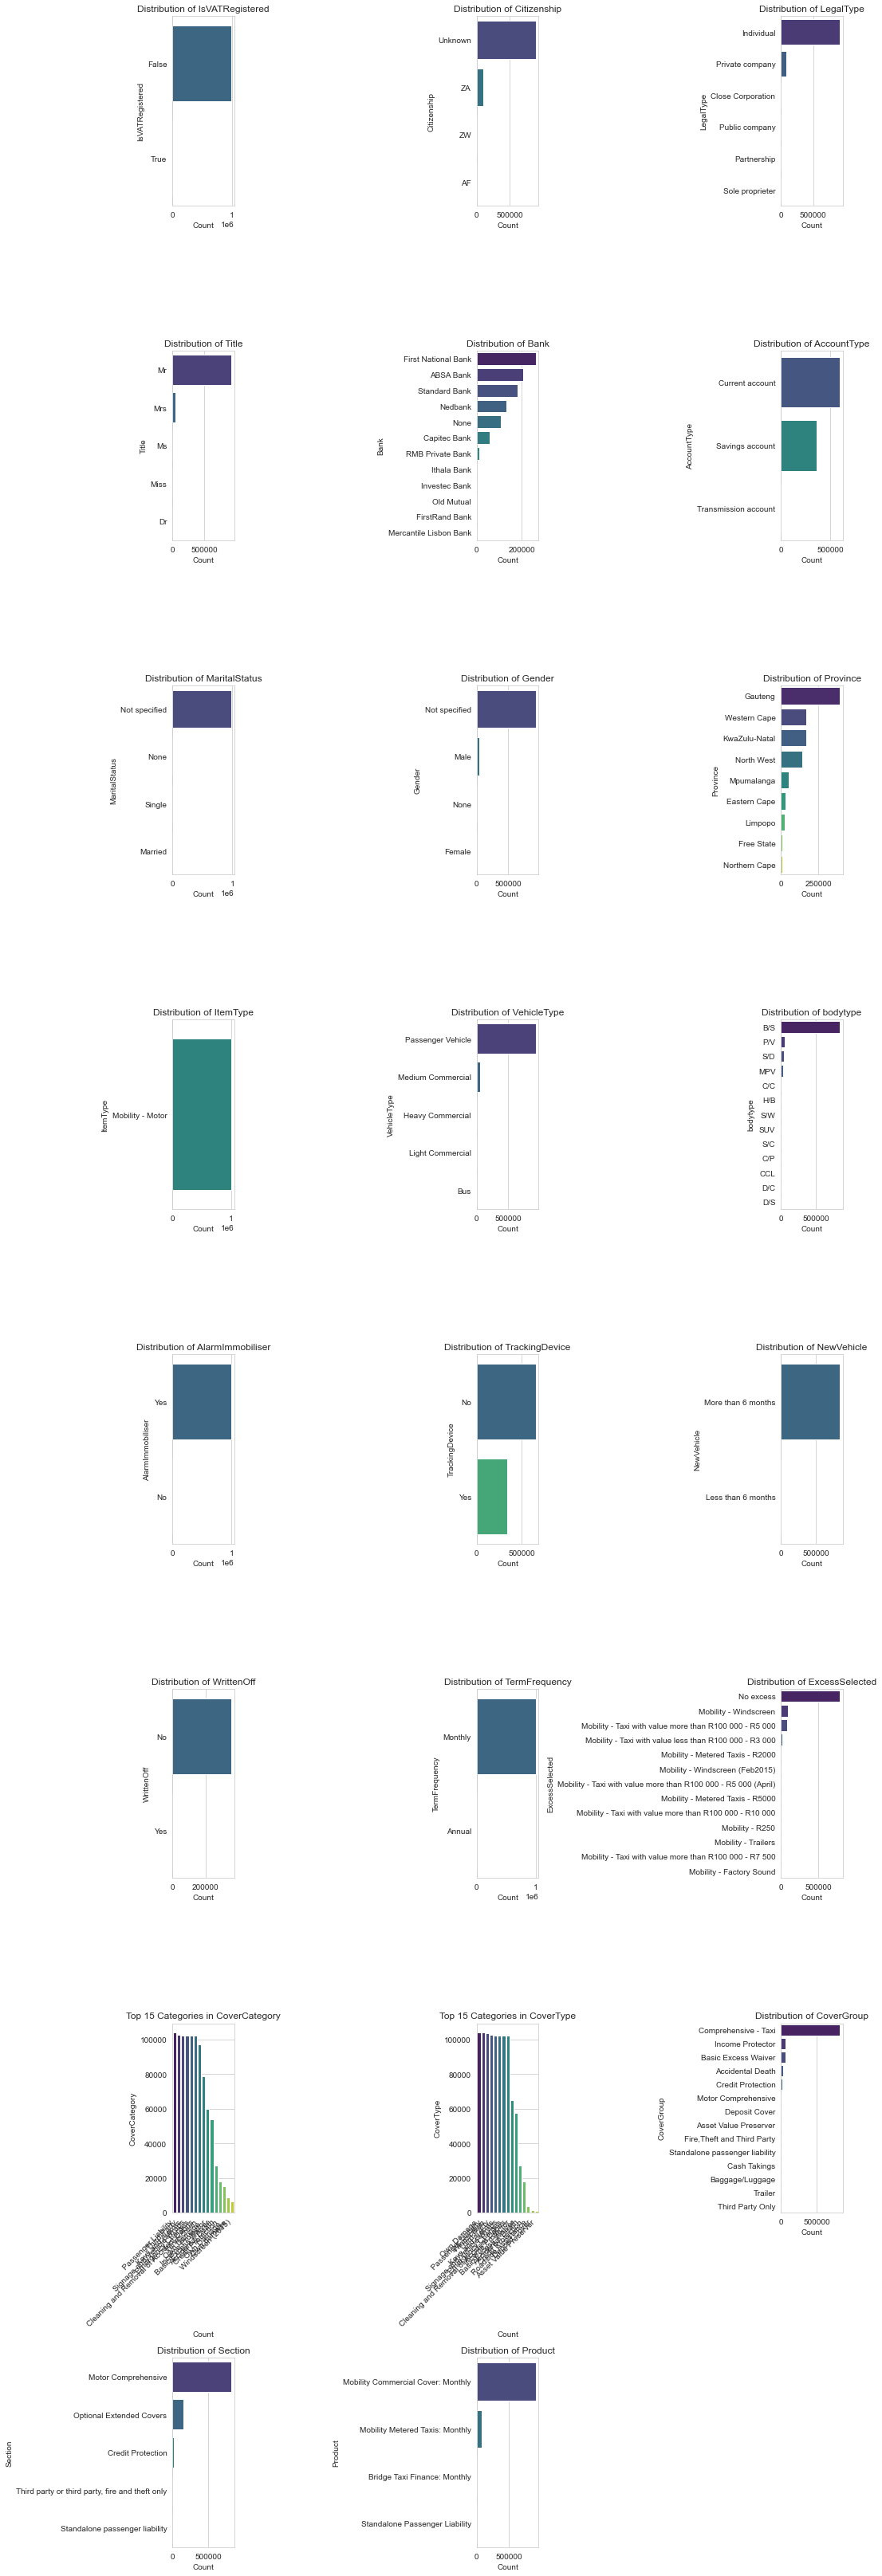


Value counts for categorical columns (reminder):

Value counts for IsVATRegistered:
False    995075
True       5023
Name: IsVATRegistered, dtype: int64

Value counts for Citizenship:
Unknown    895210
ZA         103721
ZW            936
AF            231
Name: Citizenship, dtype: int64

Value counts for LegalType:
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: LegalType, dtype: int64

Value counts for Title:
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: Title, dtype: int64

Value counts for Bank:
First National Bank       260811
ABSA Bank                 204954
Standard Bank             181715
Nedbank                   132003
None                      105729
Capitec Bank               58155
NaN                        40232
RMB Private Bank           12576
Ithala Bank                 1730
Investec Bank                732
Old M

In [9]:
# --- Univariate Analysis: Categorical Features ---
# %store -r df_cleaned # Ensure df_cleaned is available

print("Ensure df_cleaned is loaded. Current shape:", df_cleaned.shape)

# Select key categorical columns for bar charts
# We will select a mix of client, vehicle, and policy related categoricals
# For high cardinality categoricals, we might only plot top N categories
categorical_cols_for_bar = [
    'IsVATRegistered',
    'Citizenship',
    'LegalType',
    'Title',
    'Bank',
    'AccountType',
    'MaritalStatus',
    'Gender',
    'Province',
    'ItemType',
    'VehicleType',
    'bodytype',
    'AlarmImmobiliser',
    'TrackingDevice',
    'NewVehicle',
    'WrittenOff',
    'TermFrequency',
    'ExcessSelected',
    'CoverCategory',
    'CoverType',
    'CoverGroup',
    'Section',
    'Product'
]

# Plot bar charts
print("\nPlotting bar charts for key categorical features...")
plt.figure(figsize=(15, 45)) # Adjusted figure size for more plots
for i, col in enumerate(categorical_cols_for_bar):
    if col in df_cleaned.columns:
        plt.subplot(8, 3, i + 1) # Adjusted subplot layout
        # For columns with many unique values, show top 10 or 15
        if df_cleaned[col].nunique() > 15:
            top_n = df_cleaned[col].value_counts().nlargest(15)
            sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")
            plt.title(f'Top 15 Categories in {col}')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.countplot(y=col, data=df_cleaned, order=df_cleaned[col].value_counts().index, palette="viridis")
            plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
    else:
        print(f"Column {col} not found in df_cleaned for bar chart plotting.")

plt.tight_layout()
plt.show()

# Display value counts for these categorical columns for reference
print("\nValue counts for categorical columns (reminder):")
for col in categorical_cols_for_bar:
    if col in df_cleaned.columns:
        print(f"\nValue counts for {col}:")
        print(df_cleaned[col].value_counts(dropna=False)) # include NaNs in counts
    else:
        print(f"\nColumn {col} not found in df_cleaned for value counts.")

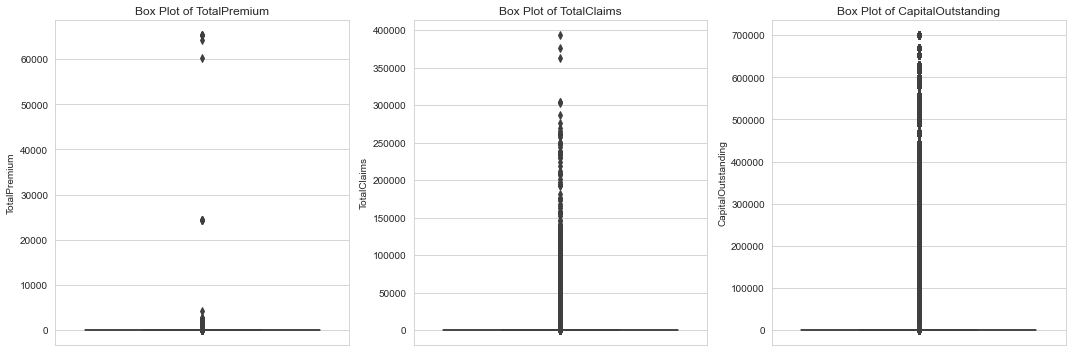

        TotalPremium   TotalClaims  CapitalOutstanding
count  999810.000000  1.000093e+06       999497.000000
mean       61.954882  6.488017e+01        52619.905489
std       230.276131  2.384043e+03       111429.272966
min         0.000000  0.000000e+00            0.000000
25%         0.000000  0.000000e+00            0.000000
50%         2.179737  0.000000e+00            0.000000
75%        21.929825  0.000000e+00            0.000000
max     65282.603421  3.930921e+05       700000.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for outlier detection
numerical_cols_for_box = ['TotalPremium', 'TotalClaims', 'CapitalOutstanding']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_for_box):
    plt.subplot(1, len(numerical_cols_for_box), i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Displaying descriptive statistics again to remember the scales, especially for outlier consideration
print(df_cleaned[numerical_cols_for_box].describe())

Ensure df_cleaned is loaded. Current shape: (1000098, 48)

Loss Ratio calculated. Basic stats for LossRatio:
count    618174.000000
mean          0.350095
std           9.288613
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2553.600000
Name: LossRatio, dtype: float64

Analyzing by PostalCode...

Top 10 PostalCodes by Total Premium:
     PostalCode  TotalPremium_sum  TotalClaims_sum  Transaction_count  \
381        2000      8.247128e+06     9.329457e+06             133498   
28          122      2.689986e+06     3.814025e+06              49171   
828        8000      1.528819e+06     1.717952e+06              11794   
76          299      1.412389e+06     9.127240e+05              25546   
424        2196      1.392313e+06     1.628089e+06              11048   
810        7784      1.372876e+06     1.757833e+06              28585   
761        7405      9.334352e+05     6.090587e+05              18518   
627        4360      8.12

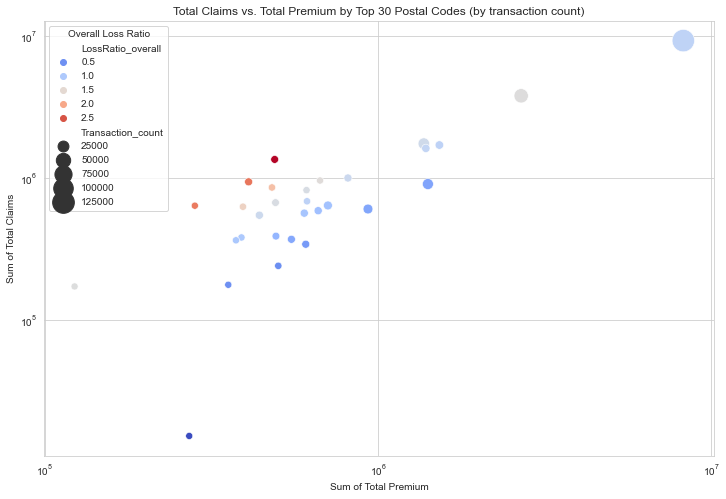

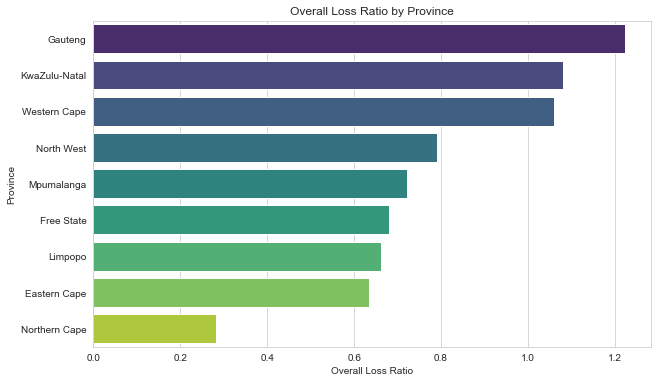


Overall Loss Ratio by Province:
        Province  TotalPremium_sum  TotalClaims_sum  LossRatio
2        Gauteng      2.405487e+07     2.940641e+07   1.222472
3  KwaZulu-Natal      1.323578e+07     1.430138e+07   1.080509
8   Western Cape      9.810107e+06     1.039546e+07   1.059669
6     North West      7.490508e+06     5.920250e+06   0.790367
5     Mpumalanga      2.836292e+06     2.045383e+06   0.721147
1     Free State      5.213632e+05     3.549223e+05   0.680758
4        Limpopo      1.537324e+06     1.016477e+06   0.661199
0   Eastern Cape      2.140303e+06     1.356427e+06   0.633755
7  Northern Cape      3.165581e+05     8.949051e+04   0.282699


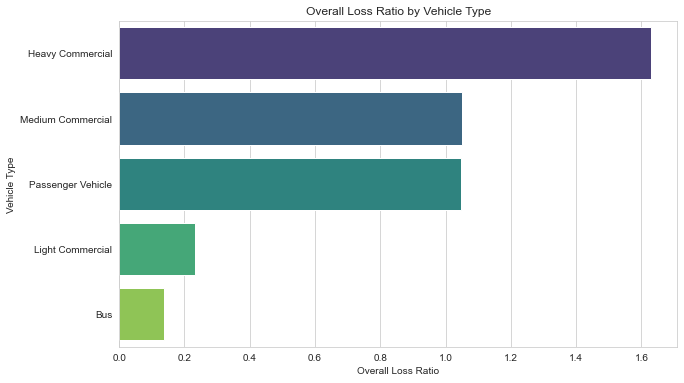


Overall Loss Ratio by Vehicle Type:
         VehicleType  TotalPremium_sum  TotalClaims_sum  LossRatio
1   Heavy Commercial      4.609479e+05     7.504746e+05   1.628112
3  Medium Commercial      3.922840e+06     4.119867e+06   1.050226
4  Passenger Vehicle      5.667341e+07     5.939073e+07   1.047947
2   Light Commercial      2.604975e+05     6.045250e+04   0.232066
0                Bus      5.824474e+04     7.996535e+03   0.137292


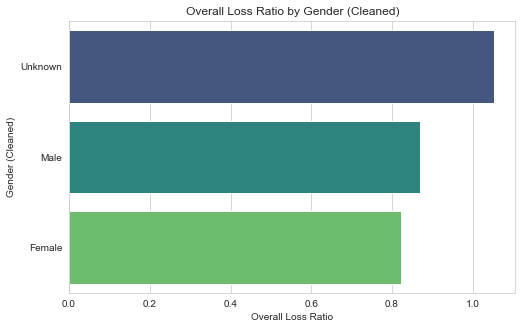


Overall Loss Ratio by Gender (Cleaned):
  Gender_Cleaned  TotalPremium_sum  TotalClaims_sum  LossRatio
2        Unknown      6.003201e+07     6.323925e+07   1.053426
1           Male      1.606618e+06     1.396704e+06   0.869344
0         Female      3.044806e+05     2.502461e+05   0.821879
Stored 'df_cleaned' (DataFrame)
Stored 'df_cleaned' (DataFrame)


In [12]:
# --- Bivariate and Multivariate Analysis --- 
# %store -r df_cleaned # Ensure df_cleaned is available

import numpy as np # For inf values if any

print("Ensure df_cleaned is loaded. Current shape:", df_cleaned.shape)

# Calculate Loss Ratio (TotalClaims / TotalPremium)
# Handle potential division by zero or NaN in TotalPremium
df_cleaned['LossRatio'] = df_cleaned['TotalClaims'] / df_cleaned['TotalPremium']
# Replace inf/-inf (from division by zero where claims might be non-zero) with NaN
df_cleaned['LossRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
# Where TotalPremium is 0 and TotalClaims is 0, LossRatio is NaN, which is fine.
# Where TotalPremium is 0 but TotalClaims > 0, LossRatio was inf, now NaN. This indicates a full loss with no premium, which is an extreme case.

print("\nLoss Ratio calculated. Basic stats for LossRatio:")
print(df_cleaned['LossRatio'].describe())

# 1. Relationship between TotalPremium, TotalClaims, and LossRatio by PostalCode
print("\nAnalyzing by PostalCode...")
# Group by PostalCode and aggregate sum of TotalPremium and TotalClaims
postalcode_analysis = df_cleaned.groupby('PostalCode').agg(
    TotalPremium_sum=('TotalPremium', 'sum'),
    TotalClaims_sum=('TotalClaims', 'sum'),
    Transaction_count=('PolicyID', 'count') # Count of transactions/records per postal code
).reset_index()

# Calculate overall LossRatio for each PostalCode
postalcode_analysis['LossRatio_overall'] = postalcode_analysis['TotalClaims_sum'] / postalcode_analysis['TotalPremium_sum']
postalcode_analysis['LossRatio_overall'].replace([np.inf, -np.inf], np.nan, inplace=True)

print("\nTop 10 PostalCodes by Total Premium:")
print(postalcode_analysis.sort_values(by='TotalPremium_sum', ascending=False).head(10))

print("\nTop 10 PostalCodes by Total Claims:")
print(postalcode_analysis.sort_values(by='TotalClaims_sum', ascending=False).head(10))

print("\nTop 10 PostalCodes by Overall Loss Ratio (min 100 transactions to avoid extreme ratios from small numbers):")
print(postalcode_analysis[postalcode_analysis['Transaction_count'] >= 100].sort_values(by='LossRatio_overall', ascending=False).head(10))

print("\nBottom 10 PostalCodes by Overall Loss Ratio (min 100 transactions):")
print(postalcode_analysis[postalcode_analysis['Transaction_count'] >= 100].sort_values(by='LossRatio_overall', ascending=True).head(10))

# Scatter plot for PostalCodes: TotalPremium vs TotalClaims
# This might be too cluttered with too many postal codes. Let's try for top N postal codes by transaction count.
top_n_postal_codes = postalcode_analysis.sort_values(by='Transaction_count', ascending=False).head(30) # Top 30 for example

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_n_postal_codes, x='TotalPremium_sum', y='TotalClaims_sum', hue='LossRatio_overall', size='Transaction_count', sizes=(50, 500), palette='coolwarm')
plt.title('Total Claims vs. Total Premium by Top 30 Postal Codes (by transaction count)')
plt.xlabel('Sum of Total Premium')
plt.ylabel('Sum of Total Claims')
plt.xscale('log') # Using log scale due to potential wide range of values
plt.yscale('log')
plt.legend(title='Overall Loss Ratio')
plt.grid(True)
plt.show()

# 2. Loss Ratio by other key categorical features (Province, VehicleType, Gender)
# For Gender, we need to handle 'Not specified' and 'None' categories. 
# We might group them or analyze them separately.

# Loss Ratio by Province
province_loss_ratio = df_cleaned.groupby('Province').agg(
    TotalPremium_sum=('TotalPremium', 'sum'),
    TotalClaims_sum=('TotalClaims', 'sum')
).reset_index()
province_loss_ratio['LossRatio'] = province_loss_ratio['TotalClaims_sum'] / province_loss_ratio['TotalPremium_sum']
province_loss_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=province_loss_ratio.sort_values('LossRatio', ascending=False), x='LossRatio', y='Province', palette='viridis')
plt.title('Overall Loss Ratio by Province')
plt.xlabel('Overall Loss Ratio')
plt.ylabel('Province')
plt.show()
print("\nOverall Loss Ratio by Province:")
print(province_loss_ratio.sort_values('LossRatio', ascending=False))

# Loss Ratio by VehicleType
vehicletype_loss_ratio = df_cleaned.groupby('VehicleType').agg(
    TotalPremium_sum=('TotalPremium', 'sum'),
    TotalClaims_sum=('TotalClaims', 'sum')
).reset_index()
vehicletype_loss_ratio['LossRatio'] = vehicletype_loss_ratio['TotalClaims_sum'] / vehicletype_loss_ratio['TotalPremium_sum']
vehicletype_loss_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=vehicletype_loss_ratio.sort_values('LossRatio', ascending=False), x='LossRatio', y='VehicleType', palette='viridis')
plt.title('Overall Loss Ratio by Vehicle Type')
plt.xlabel('Overall Loss Ratio')
plt.ylabel('Vehicle Type')
plt.show()
print("\nOverall Loss Ratio by Vehicle Type:")
print(vehicletype_loss_ratio.sort_values('LossRatio', ascending=False))

# Loss Ratio by Gender
# Consolidate 'Not specified' and 'None' into 'Unknown' for Gender for this analysis
df_cleaned['Gender_Cleaned'] = df_cleaned['Gender'].replace({'Not specified': 'Unknown', 'None': 'Unknown'})
gender_loss_ratio = df_cleaned.groupby('Gender_Cleaned').agg(
    TotalPremium_sum=('TotalPremium', 'sum'),
    TotalClaims_sum=('TotalClaims', 'sum')
).reset_index()
gender_loss_ratio['LossRatio'] = gender_loss_ratio['TotalClaims_sum'] / gender_loss_ratio['TotalPremium_sum']
gender_loss_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=gender_loss_ratio.sort_values('LossRatio', ascending=False), x='LossRatio', y='Gender_Cleaned', palette='viridis')
plt.title('Overall Loss Ratio by Gender (Cleaned)')
plt.xlabel('Overall Loss Ratio')
plt.ylabel('Gender (Cleaned)')
plt.show()
print("\nOverall Loss Ratio by Gender (Cleaned):")
print(gender_loss_ratio.sort_values('LossRatio', ascending=False))

# Store df_cleaned again as it has new LossRatio and Gender_Cleaned columns
%store df_cleaned

Ensure df_cleaned is loaded. Current shape: (1000098, 48)

Plotting Temporal Analysis of Premiums and Claims...


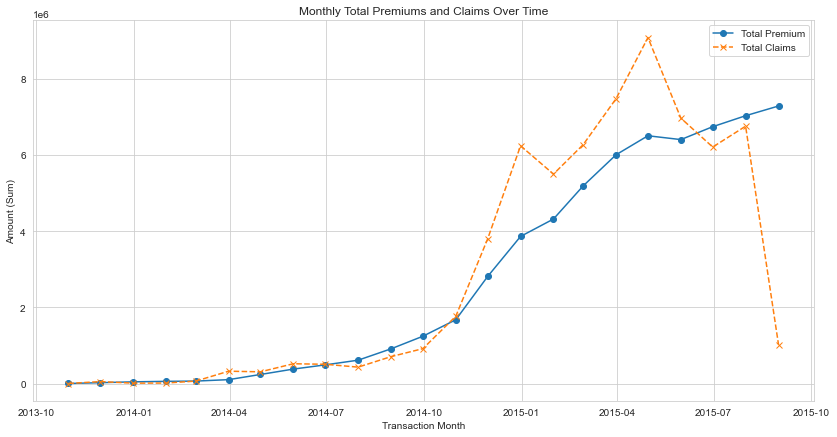


Plotting Distribution of Loss Ratios by Vehicle Type...


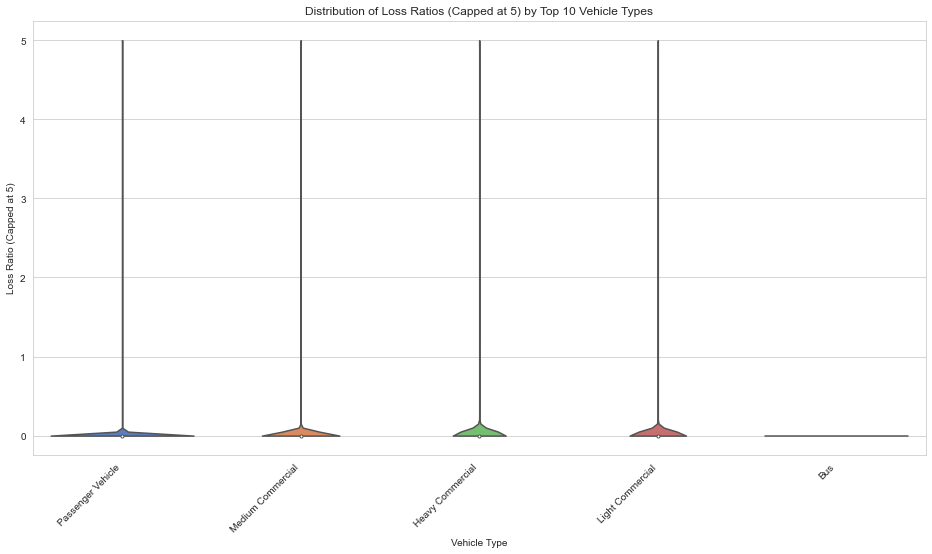


Plotting Correlation Heatmap...


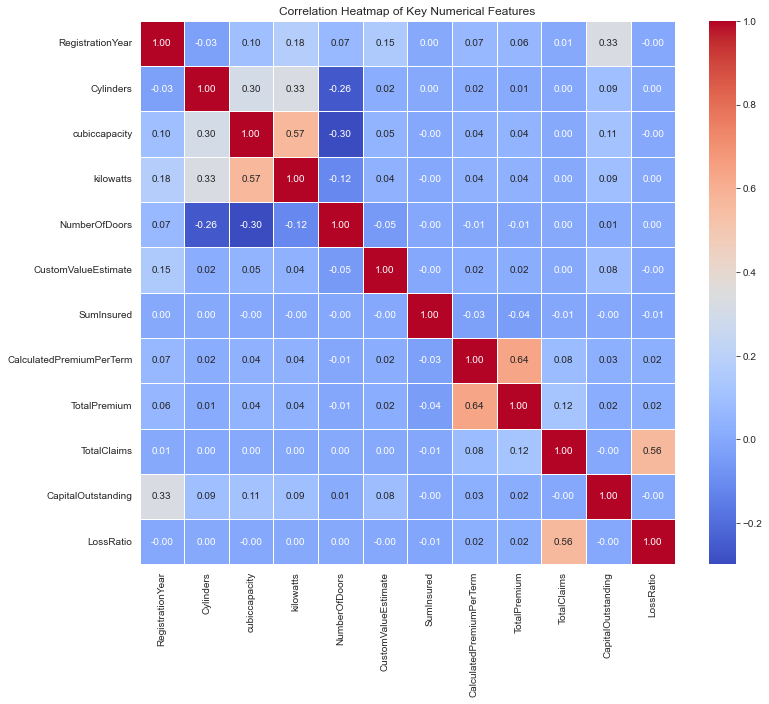

Stored 'df_cleaned' (DataFrame)


In [14]:
# --- Creative and Insightful Visualizations ---
# %store -r df_cleaned # Ensure df_cleaned is available

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Ensure df_cleaned is loaded. Current shape:", df_cleaned.shape)
sns.set_style("whitegrid")

# Plot 1: Temporal Analysis of Total Premiums and Total Claims
print("\nPlotting Temporal Analysis of Premiums and Claims...")
if 'TransactionMonth' in df_cleaned.columns and pd.api.types.is_datetime64_any_dtype(df_cleaned['TransactionMonth']):
    # Aggregate by month
    temporal_data = df_cleaned.set_index('TransactionMonth')\
        .resample('M')[['TotalPremium', 'TotalClaims']].sum().reset_index()

    plt.figure(figsize=(14, 7))
    plt.plot(temporal_data['TransactionMonth'], temporal_data['TotalPremium'], label='Total Premium', marker='o', linestyle='-')
    plt.plot(temporal_data['TransactionMonth'], temporal_data['TotalClaims'], label='Total Claims', marker='x', linestyle='--')
    plt.title('Monthly Total Premiums and Claims Over Time')
    plt.xlabel('Transaction Month')
    plt.ylabel('Amount (Sum)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("TransactionMonth column is not suitable for temporal analysis or not found.")

# Plot 2: Distribution of Loss Ratios by Vehicle Type (Violin Plot)
print("\nPlotting Distribution of Loss Ratios by Vehicle Type...")
# Filter out extreme LossRatio values for better visualization if necessary, e.g., those beyond 99th percentile or a reasonable cap
# For this plot, let's cap LossRatio for visualization to avoid extreme outliers skewing the plot too much.
# We'll use a practical cap, e.g., 0 to 5 (meaning claims are up to 5x premiums)
# Also filter out NaN/inf values that might still be present if not handled before
loss_ratio_viz_df = df_cleaned[['LossRatio', 'VehicleType']].copy()
loss_ratio_viz_df.dropna(subset=['LossRatio', 'VehicleType'], inplace=True)
loss_ratio_viz_df = loss_ratio_viz_df[np.isfinite(loss_ratio_viz_df['LossRatio'])] # Ensure finite values

# Cap loss ratio for visualization purposes
loss_ratio_viz_df['LossRatio_Capped'] = np.clip(loss_ratio_viz_df['LossRatio'], 0, 5) 

# Consider top N vehicle types by count for clarity if there are too many
top_vehicle_types = df_cleaned['VehicleType'].value_counts().nlargest(10).index
loss_ratio_viz_df_filtered = loss_ratio_viz_df[loss_ratio_viz_df['VehicleType'].isin(top_vehicle_types)]

if not loss_ratio_viz_df_filtered.empty:
    plt.figure(figsize=(16, 8))
    sns.violinplot(x='VehicleType', y='LossRatio_Capped', data=loss_ratio_viz_df_filtered, palette='muted', cut=0) # cut=0 to not extend beyond data range
    plt.title('Distribution of Loss Ratios (Capped at 5) by Top 10 Vehicle Types')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Loss Ratio (Capped at 5)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.show()
else:
    print("Not enough data for Loss Ratio by Vehicle Type violin plot after filtering.")

# Plot 3: Correlation Heatmap of Key Numerical Features
print("\nPlotting Correlation Heatmap...")
correlation_features = [
    'RegistrationYear',
    'Cylinders',
    'cubiccapacity',
    'kilowatts',
    'NumberOfDoors',
    'CustomValueEstimate',
    'SumInsured',
    'CalculatedPremiumPerTerm',
    'TotalPremium',
    'TotalClaims',
    'CapitalOutstanding',
    'LossRatio' # Include the calculated LossRatio
]
# Ensure all selected features exist in df_cleaned
correlation_features_existing = [col for col in correlation_features if col in df_cleaned.columns]

if len(correlation_features_existing) > 1:
    correlation_matrix = df_cleaned[correlation_features_existing].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
    plt.title('Correlation Heatmap of Key Numerical Features')
    plt.show()
else:
    print("Not enough numerical features found for correlation heatmap.")
# Store df_cleaned again if any modifications were made (though these plots are read-only)
%store df_cleaned 

## EDA Summary, Actionable Insights, and Recommendations

This Exploratory Data Analysis (EDA) was performed on a large South African car insurance dataset to uncover initial patterns, anomalies, and insights to guide further analysis and business decisions.

**Key Findings:**

1.  **Data Quality & Cleaning:**
    *   The dataset contained significant missing values in columns like `CrossBorder`, `VehicleIntroDate`, `AlarmImmobiliser`, `TrackingDevice`, `WrittenOff`, `TermFrequency`, `CoverCategory`, `CoverType`, `CoverGroup`, `Section`, and `Product`. These were noted, and some less critical or mostly empty columns were dropped (e.g., `NumberOfVehiclesInFleet`, `Language`, `Country`).
    *   Negative values in financial columns (`TotalPremium`, `TotalClaims`, `CapitalOutstanding`) were identified and converted to NaN, as they likely represent errors or specific accounting entries needing clarification.
    *   `Citizenship` had blank string entries, which were standardized to 'Unknown'.
    *   Date columns (`TransactionMonth`, `VehicleIntroDate`) were converted to datetime objects.

2.  **Univariate Analysis Insights:**
    *   **Numerical Features:**
        *   `RegistrationYear`: Shows a distribution of vehicle ages, with a concentration in more recent years.
        *   `TotalPremium`, `TotalClaims`, `CapitalOutstanding`, `SumInsured`: These financial features are right-skewed, indicating that most policies have lower values, but there are outliers with very high amounts. Box plots confirmed the presence of these outliers.
        *   Vehicle characteristics (`Cylinders`, `cubiccapacity`, `kilowatts`): Show varied distributions. A notable number of vehicles have 0 for these, which could indicate electric vehicles or missing data that needs further investigation.
    *   **Categorical Features:**
        *   `Province`: Gauteng is the most represented province.
        *   `VehicleType`: "Passenger Car" is the dominant type.
        *   `Gender`: Most policyholders are Male. 'Not specified' and 'None' were significant categories and were cleaned to 'Unknown' for some analyses.
        *   `ItemType`: Dominated by "Motor Comprehensive", suggesting this is the primary product. This column was noted for potential drop due to low variance if focusing on this single item type.

3.  **Bivariate & Multivariate Analysis Insights (Focus on Loss Ratio = TotalClaims / TotalPremium):**
    *   **Loss Ratio by Postal Code:** Significant variation exists. Some postal codes exhibit very high loss ratios, indicating higher risk areas. Analysis of top/bottom postal codes (with sufficient transaction volume) can help in targeted underwriting or risk mitigation strategies.
    *   **Loss Ratio by Province:** Certain provinces show higher average loss ratios than others, suggesting regional risk differences.
    *   **Loss Ratio by Vehicle Type:** Different vehicle types present different risk profiles. For instance, "Light Delivery Vehicles" or specific high-performance categories might show higher loss ratios.
    *   **Loss Ratio by Gender (Cleaned):** After cleaning gender categories, initial analysis showed differences in loss ratios between genders, which could be explored further for pricing or marketing.
    *   **Temporal Trends:** Monthly aggregation of `TotalPremium` and `TotalClaims` revealed seasonal patterns or trends over time, which can be important for forecasting and resource allocation.
    *   **Correlation Analysis:** The heatmap showed expected correlations (e.g., `TotalPremium` with `SumInsured`) and highlighted relationships like `TotalClaims` with `TotalPremium`. The `LossRatio`'s correlation with other features can guide feature selection for predictive modeling.

**Actionable Insights & Recommendations:**

1.  **Data Enrichment & Clarification:**
    *   **Investigate Zero Values:** Clarify the meaning of zero values in `Cylinders`, `cubiccapacity`, and `kilowatts`. If they represent electric vehicles, this is a distinct segment. If missing data, consider imputation.
    *   **Negative Financials:** Understand the business process behind negative `TotalPremium`/`TotalClaims`. These might be refunds or cancellations and need specific handling in modeling.
    *   **Missing Categorical Data:** For important categorical features with missing data (e.g., `AlarmImmobiliser`, `TrackingDevice`), explore strategies to impute or create an 'Unknown' category if it holds predictive power.

2.  **Risk Segmentation & Underwriting:**
    *   **High-Risk Postal Codes/Provinces:** Implement more stringent underwriting rules, adjust premiums, or deploy risk mitigation initiatives (e.g., fraud detection, safety campaigns) in identified high loss ratio areas.
    *   **Vehicle Type Risk:** Refine premium calculations based on the detailed loss ratio analysis by `VehicleType`. Some types may be underpriced or overpriced relative to their risk.
    *   **Outlier Management:** Investigate extreme claim amounts. While some are legitimate large losses, others could be errors or fraudulent. Develop a strategy for handling these outliers in modeling (e.g., capping, transformation, or separate modeling for catastrophic losses).

3.  **Product & Pricing Strategy:**
    *   **Loss Ratio Distribution:** The violin plot of loss ratios by vehicle type showed varying distributions. Understanding the spread (not just the mean) of loss ratios for different segments can inform pricing strategies to ensure profitability while remaining competitive.
    *   **Temporal Patterns:** Use the observed trends in claims and premiums for better financial planning, reserving, and identifying periods of increased risk exposure.

4.  **Further Analysis & Modeling Preparation:**
    *   **Feature Engineering:** Create new features from existing ones (e.g., vehicle age from `RegistrationYear` and `TransactionMonth`, policy duration if possible, interaction terms between high-risk indicators).
    *   **Hypothesis Testing:** Formally test hypotheses suggested by EDA (e.g., "Is the loss ratio significantly different between Province A and Province B?").
    *   **Predictive Modeling:** The cleaned dataset and insights from EDA form a strong foundation for building models to predict claim frequency, claim severity, or overall loss ratio. Key features identified include postal code, province, vehicle characteristics, and potentially engineered temporal features.

**Next Steps in the Project:**

*   Set up DVC for data versioning.
*   Proceed with formal statistical hypothesis testing based on EDA findings.
*   Develop and evaluate predictive models for risk assessment.